# **Quantitative Trading Strategy Using Machine Learning**

## **Introduction**:
The **Quantitative Trading Strategy** project applies machine learning and data-driven insights to optimize trading decisions in the stock market. Utilizing historical financial data from the S&P 500, this project builds predictive models to forecast stock price movements and generate buy/sell signals. By integrating machine learning techniques, this system automates the analysis of large datasets, allowing for the development of effective trading strategies that aim to outperform traditional benchmarks.

### **Project Description**:
QuantStock is a stock performance evaluation and benchmarking system that analyzes the historical performance of selected S&P 500 stocks and compares them against a market benchmark. Using machine learning models, QuantStock calculates financial metrics, backtests trading strategies, and generates reports that help investors optimize their stock portfolios based on historical data and risk-adjusted returns.

### **Key Questions**

1. How can stock performance be benchmarked against the S&P 500 using machine learning models?
2. Which technical indicators can improve stock price prediction accuracy?
3. What are the most effective machine learning models for stock market analysis (RandomForest, XGBoost, LSTM)?
4. How can automated reporting and visualization aid decision-making for investors?

### **Technologies**

- Python (Pandas, Scikit-learn, yFinance, TensorFlow)
- Machine Learning (RandomForest, XGBoost, LSTM)
- Financial Indicators (SMA, EMA, RSI)
- Data Visualization (Matplotlib, Seaborn)
- Automated Reporting (FPDF for generating reports)

### **The system includes**:

**Predictive Model for Stock Movements**:
Utilizes machine learning models (Random Forest, XGBoost, LSTM) to predict stock price trends and generate actionable buy/sell signals for S&P 500 stocks.

**Technical Indicators**:
Incorporates essential technical analysis metrics such as Simple Moving Average (SMA), Exponential Moving Average (EMA), and Relative Strength Index (RSI) to support more informed trading decisions and improve prediction accuracy.

**Backtesting and Portfolio Simulation**:
Simulates the historical performance of the trading strategy using backtesting techniques, allowing users to assess key financial metrics like Sharpe Ratio, Cumulative Returns, and Maximum Drawdown.

**Financial Metrics**:
Analyzes the risk and return of the trading strategy through key financial indicators, including volatility, Sharpe Ratio, and risk-adjusted returns, to help traders evaluate profitability and manage risk effectively.

In [1]:
import os
os.chdir("/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy")
print(os.getcwd())

/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy


In [2]:
import sys
sys.path.append('/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/scripts')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
! pip uninstall keras tensorflow -y

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0


In [5]:
! pip install -r '/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/requirements.txt'

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)


In [60]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scripts.fetch_stock_data import fetch_stock_data
from scripts.models import train_random_forest, train_xgboost, train_lstm_model
from scripts.backtest_strategy import compare_models
from scripts.backtest_strategy import backtest_strategize
from scripts.sentiment_analysis import get_sentiment
from scripts.generate_report import generate_report


## Fetching live stock data

In [56]:
# Fetch live stock data
apple_data = fetch_stock_data('AAPL')
sp500_data = fetch_stock_data('SPY')

/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/scripts/fetch_stock_data.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dividends'].fillna(0, inplace=True)
/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/scripts/fetch_stock_data.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assign

### Plot stock data

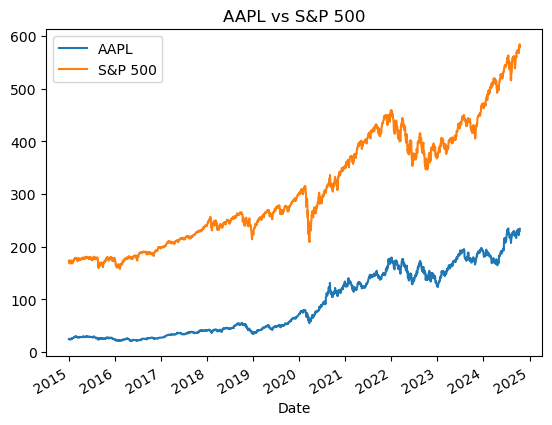

In [57]:
# Plot stock data
apple_data['Close'].plot(label="AAPL")
sp500_data['Close'].plot(label="S&P 500")
plt.legend()
plt.title("AAPL vs S&P 500")
plt.show()

### Prepare data for Model Training 

In [58]:
# Here we assume 'Close' is the feature we're predicting based on historical 'Close' prices
apple_data['Target'] = apple_data['Close'].shift(-1)  # Predict the next day's 'Close'
apple_data = apple_data.dropna()

In [59]:
# Use 'Close' prices as features for simplicity (can be extended to use other features)
X = apple_data[['Close']]
y = (apple_data['Target'] > apple_data['Close']).astype(int)  # Binary classification

In [81]:
# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 20% of the original data for validation

### Train Model

In [82]:
# Train models
rf_model, rf_accuracy, rf_report = train_random_forest(X_train, y_train, X_val, y_val)
xgb_model, xgb_accuracy, xgb_report = train_xgboost(X_train, y_train, X_val, y_val)
lstm_model, lstm_accuracy, lstm_report = train_lstm_model(X_train, y_train, X_val, y_val)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:21] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspa


[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=500,

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:22] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.3s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspa

[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.5s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:24] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s

[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s

[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimator

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.3s

[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:26] WARNING: /workspa

[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.4s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, sub

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsamp

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:27] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=1

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s

[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:28] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsamp

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, 

/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.4s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.4s[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.4s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.6; total time=   0.4s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspa

[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1.0; total time=   0.2s


/home/vic3/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024-10-16 15:23:32.404863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-16 15:23:32.413647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
20

Epoch 1/20


2024-10-16 15:23:35.033449: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-16 15:23:35.051120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-16 15:23:35.057457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

43/47 [==========================>...] - ETA: 0s - loss: 0.4525

2024-10-16 15:23:45.749440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-16 15:23:45.752445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-16 15:23:45.754731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

47/47 [==============================] - 12s 39ms/step - loss: 0.4454 - val_loss: 0.3221
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.2713 - val_loss: 0.2529
Epoch 3/20
47/47 [==============================] - 0s 8ms/step - loss: 0.2513 - val_loss: 0.2517
Epoch 4/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2529 - val_loss: 0.2517
Epoch 5/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2499 - val_loss: 0.2529
Epoch 6/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2537 - val_loss: 0.2505
Epoch 7/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2502 - val_loss: 0.2511
Epoch 8/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2505 - val_loss: 0.2518
Epoch 9/20
47/47 [==============================] - 0s 6ms/step - loss: 0.2490 - val_loss: 0.2509
Epoch 10/20
47/47 [==============================] - 0s 5ms/step - loss: 0.2525 - val_loss: 0.2534
Epoch 11/20
47/47 [=========

2024-10-16 15:24:11.582664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-10-16 15:24:11.585685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-10-16 15:24:11.587370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 20s 3ms/step


/home/vic3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vic3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vic3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Model Performance

In [83]:
# After training the models
print("RandomForest Hyperparameters:")
print(rf_model.get_params())

print("\nXGBoost Hyperparameters:")
print(xgb_model.get_params())
print("LSTM Model Summary:")
lstm_model.summary()

RandomForest Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

XGBoost Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': No

In [84]:
# If you used GridSearchCV or RandomizedSearchCV
print("Best RandomForest Model:", rf_model)

Best RandomForest Model: RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)


In [85]:
print("Random Forest Validation Accuracy:", rf_accuracy)
print("Random Forest Validation Report:\n", rf_report)
print("XGBoost Validation Accuracy:", xgb_accuracy)
print("XGBoost Validation Report:\n", xgb_report)
print("LSTM Validation Accuracy:", lstm_accuracy)
print("LSTM Validation Report:\n", lstm_report)

Random Forest Validation Accuracy: 0.5091277890466531
Random Forest Validation Report:
               precision    recall  f1-score   support

           0       0.50      0.10      0.16       242
           1       0.51      0.91      0.65       251

    accuracy                           0.51       493
   macro avg       0.51      0.50      0.41       493
weighted avg       0.51      0.51      0.41       493

XGBoost Validation Accuracy: 0.5030425963488844
XGBoost Validation Report:
               precision    recall  f1-score   support

           0       0.41      0.03      0.05       242
           1       0.51      0.96      0.66       251

    accuracy                           0.50       493
   macro avg       0.46      0.49      0.36       493
weighted avg       0.46      0.50      0.36       493

LSTM Validation Accuracy: 0.5091277890466531
LSTM Validation Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
   

### Compare Models and Backtest

In [86]:
# Compare models and backtest
rf_backtest, xgb_backtest, lstm_backtest = compare_models(apple_data, rf_model, xgb_model, lstm_model, X)

77/77 [==============================] - 1s 6ms/step


### Plot backtest results

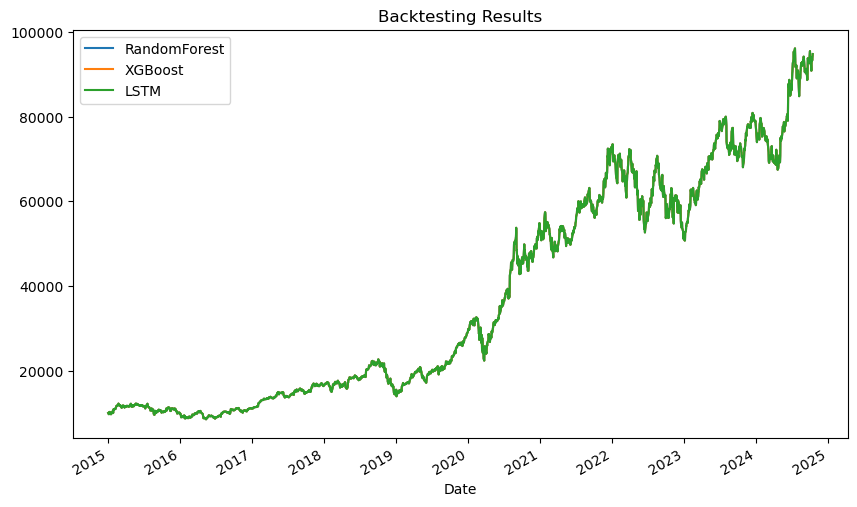

In [87]:
# Plot backtest results
plt.figure(figsize=(10, 6))
rf_backtest['Balance'].plot(label="RandomForest")
xgb_backtest['Balance'].plot(label="XGBoost")
lstm_backtest['Balance'].plot(label="LSTM")
sp500_data['Close'].plot(label="S&P 500")
plt.legend()
plt.title("Backtesting Results")
plt.show()

### Return vs Benchmark

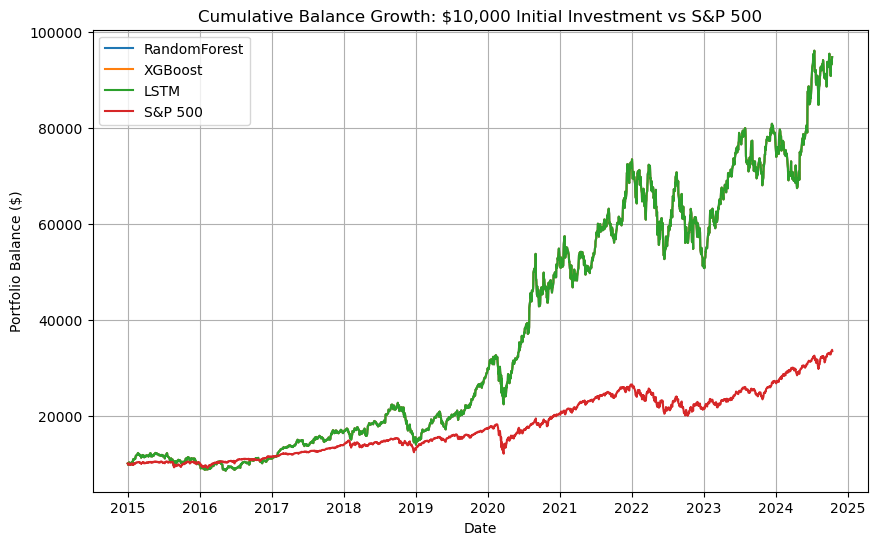

In [93]:
import matplotlib.pyplot as plt

# Initial investment amount
initial_balance = 10000

# Function to normalize balance
def normalize_balance(balance_data):
    return initial_balance * (balance_data / balance_data.iloc[0])

# Normalize the balance for RandomForest, XGBoost, LSTM models, and S&P 500
rf_cumulative_balance = normalize_balance(rf_backtest['Balance'])
xgb_cumulative_balance = normalize_balance(xgb_backtest['Balance'])
lstm_cumulative_balance = normalize_balance(lstm_backtest['Balance'])
sp500_cumulative_balance = normalize_balance(sp500_data['Close'])

# Plotting cumulative balance over time
plt.figure(figsize=(10, 6))
plt.plot(rf_cumulative_balance.index, rf_cumulative_balance, label="RandomForest")
plt.plot(xgb_cumulative_balance.index, xgb_cumulative_balance, label="XGBoost")
plt.plot(lstm_cumulative_balance.index, lstm_cumulative_balance, label="LSTM")
plt.plot(sp500_cumulative_balance.index, sp500_cumulative_balance, label="S&P 500")

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Portfolio Balance ($)')
plt.title(f'Cumulative Balance Growth: $10,000 Initial Investment vs S&P 500')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### Generate PDF report

In [94]:
# Generate PDF report
generate_report(stock_data=apple_data, predictions=rf_backtest['Balance'], stock_name='AAPL', initial_balance=10000, final_balance=rf_backtest['Balance'].iloc[-1])

/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/scripts/fetch_stock_data.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Dividends'].fillna(0, inplace=True)
/home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/scripts/fetch_stock_data.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assign

Report saved at: /home/vic3/github/Quantitative-Trading-Strategy-using-Machine-Learning-Statistical-Modeling-on-Financial-Data/Quantitative_Trading_Strategy/data/AAPL_performance_report.pdf


In [72]:
# Sentiment analysis example
news = "Apple releases record-breaking earnings for Q3"
sentiment = get_sentiment(news)
print(f"Sentiment: {sentiment}")

Sentiment: [{'label': 'Positive', 'score': 0.9999997615814209}]


In [80]:
print(y_train.value_counts())
print(y_val.value_counts())

1    789
0    687
Name: count, dtype: int64
1    251
0    242
Name: count, dtype: int64
